<a href="https://colab.research.google.com/github/Seysande/nle-prediction/blob/main/nle_evaluation_NN_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data and Packages

In [1]:
!pip install rdkit-pypi
!pip install bayesian-optimization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 27.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import xgboost as xgb
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from imblearn.pipeline import Pipeline

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, precision_score, recall_score, average_precision_score
from bayes_opt import BayesianOptimization
from imblearn.over_sampling import SMOTE

df = pd.read_csv('drugData_jan-2024.csv')
smiles_list = df['smiles'].tolist()

In [3]:
def smiles_to_mol(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            raise ValueError(f"Invalid SMILES string: {smiles}")
        return mol
    except Exception as e:
        print(e)
        return None

molecules = [smiles_to_mol(smiles) for smiles in smiles_list]
molecules = [mol for mol in molecules if mol is not None]
fingerprints = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048) for mol in molecules]
df['fingerprint'] = fingerprints
df = df.drop('smiles', axis=1)

X = np.array(list(df['fingerprint']))
y = df['label']
y = np.array(y)

np.shape(X)
display(X)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Training and Optimization

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50, Validation Loss: 0.3163, Validation Accuracy: 0.9036
Epoch 2/50, Validation Loss: 0.1544, Validation Accuracy: 0.9557
Epoch 3/50, Validation Loss: 0.4752, Validation Accuracy: 0.9531
Epoch 4/50, Validation Loss: 0.4718, Validation Accuracy: 0.9531
Epoch 5/50, Validation Loss: 0.5174, Validation Accuracy: 0.9401
Epoch 6/50, Validation Loss: 0.5367, Validation Accuracy: 0.9557
Epoch 7/50, Validation Loss: 0.3449, Validation Accuracy: 0.9609
Epoch 8/50, Validation Loss: 0.5883, Validation Accuracy: 0.9505
Epoch 9/50, Validation Loss: 0.5752, Validation Accuracy: 0.9531
Epoch 10/50, Validation Loss: 0.3495, Validation Accuracy: 0.9635
Epoch 11/50, Validation Loss: 0.5268, Validation Accuracy: 0.9427
Epoch 12/50, Validation Loss: 0.8663, Validation Accuracy: 0.9453
Epoch 13/50, Validation Loss: 0.6233, Validation Accuracy: 0.9349
Epoch 14/50, Validation Loss: 0.6556, Validation Accuracy: 0.9505
Epoch 15/50, Validation Loss: 0.6878, Validation Accuracy: 0.9453
Epoch 16/50, Valida

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50, Validation Loss: 0.3563, Validation Accuracy: 0.8906
Epoch 2/50, Validation Loss: 0.3496, Validation Accuracy: 0.9401
Epoch 3/50, Validation Loss: 0.4254, Validation Accuracy: 0.9245
Epoch 4/50, Validation Loss: 0.7656, Validation Accuracy: 0.9297
Epoch 5/50, Validation Loss: 0.7875, Validation Accuracy: 0.9297
Epoch 6/50, Validation Loss: 0.7703, Validation Accuracy: 0.9219
Epoch 7/50, Validation Loss: 0.8058, Validation Accuracy: 0.9297
Epoch 8/50, Validation Loss: 0.8567, Validation Accuracy: 0.9349
Epoch 9/50, Validation Loss: 0.8997, Validation Accuracy: 0.9297
Epoch 10/50, Validation Loss: 0.9448, Validation Accuracy: 0.9245
Epoch 11/50, Validation Loss: 0.7527, Validation Accuracy: 0.9349
Epoch 12/50, Validation Loss: 1.2222, Validation Accuracy: 0.9297
Epoch 13/50, Validation Loss: 0.7886, Validation Accuracy: 0.9349
Epoch 14/50, Validation Loss: 1.4211, Validation Accuracy: 0.9271
Epoch 15/50, Validation Loss: 1.2263, Validation Accuracy: 0.9297
Epoch 16/50, Valida

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50, Validation Loss: 0.2503, Validation Accuracy: 0.9479
Epoch 2/50, Validation Loss: 0.2151, Validation Accuracy: 0.9635
Epoch 3/50, Validation Loss: 0.3052, Validation Accuracy: 0.9479
Epoch 4/50, Validation Loss: 0.3146, Validation Accuracy: 0.9453
Epoch 5/50, Validation Loss: 0.3003, Validation Accuracy: 0.9453
Epoch 6/50, Validation Loss: 0.3380, Validation Accuracy: 0.9583
Epoch 7/50, Validation Loss: 0.3944, Validation Accuracy: 0.9531
Epoch 8/50, Validation Loss: 0.4349, Validation Accuracy: 0.9531
Epoch 9/50, Validation Loss: 0.4099, Validation Accuracy: 0.9531
Epoch 10/50, Validation Loss: 0.4267, Validation Accuracy: 0.9609
Epoch 11/50, Validation Loss: 0.4338, Validation Accuracy: 0.9505
Epoch 12/50, Validation Loss: 0.4545, Validation Accuracy: 0.9661
Epoch 13/50, Validation Loss: 0.4503, Validation Accuracy: 0.9531
Epoch 14/50, Validation Loss: 0.4660, Validation Accuracy: 0.9531
Epoch 15/50, Validation Loss: 0.4821, Validation Accuracy: 0.9583
Epoch 16/50, Valida

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50, Validation Loss: 0.2753, Validation Accuracy: 0.9375
Epoch 2/50, Validation Loss: 0.2410, Validation Accuracy: 0.9375
Epoch 3/50, Validation Loss: 0.2775, Validation Accuracy: 0.9453
Epoch 4/50, Validation Loss: 0.3910, Validation Accuracy: 0.9375
Epoch 5/50, Validation Loss: 0.5181, Validation Accuracy: 0.9193
Epoch 6/50, Validation Loss: 0.5097, Validation Accuracy: 0.9323
Epoch 7/50, Validation Loss: 0.4824, Validation Accuracy: 0.9401
Epoch 8/50, Validation Loss: 0.4468, Validation Accuracy: 0.9401
Epoch 9/50, Validation Loss: 0.4931, Validation Accuracy: 0.9349
Epoch 10/50, Validation Loss: 0.4994, Validation Accuracy: 0.9349
Epoch 11/50, Validation Loss: 0.5204, Validation Accuracy: 0.9297
Epoch 12/50, Validation Loss: 0.5668, Validation Accuracy: 0.9245
Epoch 13/50, Validation Loss: 0.5157, Validation Accuracy: 0.9323
Epoch 14/50, Validation Loss: 0.6713, Validation Accuracy: 0.9193
Epoch 15/50, Validation Loss: 0.6278, Validation Accuracy: 0.9323
Epoch 16/50, Valida

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50, Validation Loss: 0.3013, Validation Accuracy: 0.8984
Epoch 2/50, Validation Loss: 0.2162, Validation Accuracy: 0.9453
Epoch 3/50, Validation Loss: 0.3180, Validation Accuracy: 0.9505
Epoch 4/50, Validation Loss: 0.3373, Validation Accuracy: 0.9401
Epoch 5/50, Validation Loss: 0.3661, Validation Accuracy: 0.9531
Epoch 6/50, Validation Loss: 0.4297, Validation Accuracy: 0.9401
Epoch 7/50, Validation Loss: 0.4232, Validation Accuracy: 0.9531
Epoch 8/50, Validation Loss: 0.4580, Validation Accuracy: 0.9401
Epoch 9/50, Validation Loss: 0.4878, Validation Accuracy: 0.9401
Epoch 10/50, Validation Loss: 0.5039, Validation Accuracy: 0.9505
Epoch 11/50, Validation Loss: 0.4702, Validation Accuracy: 0.9401
Epoch 12/50, Validation Loss: 0.4873, Validation Accuracy: 0.9401
Epoch 13/50, Validation Loss: 0.5002, Validation Accuracy: 0.9427
Epoch 14/50, Validation Loss: 0.5197, Validation Accuracy: 0.9427
Epoch 15/50, Validation Loss: 0.5419, Validation Accuracy: 0.9427
Epoch 16/50, Valida

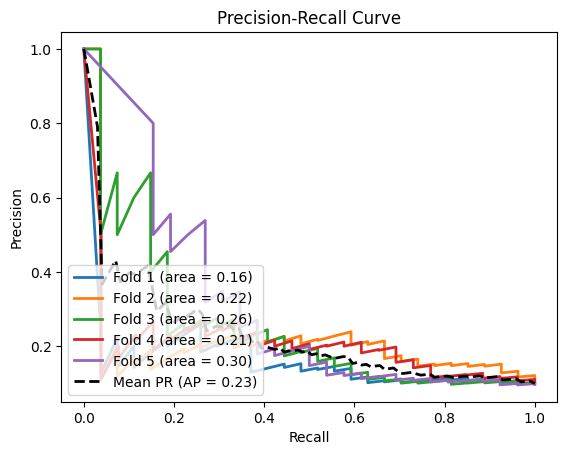

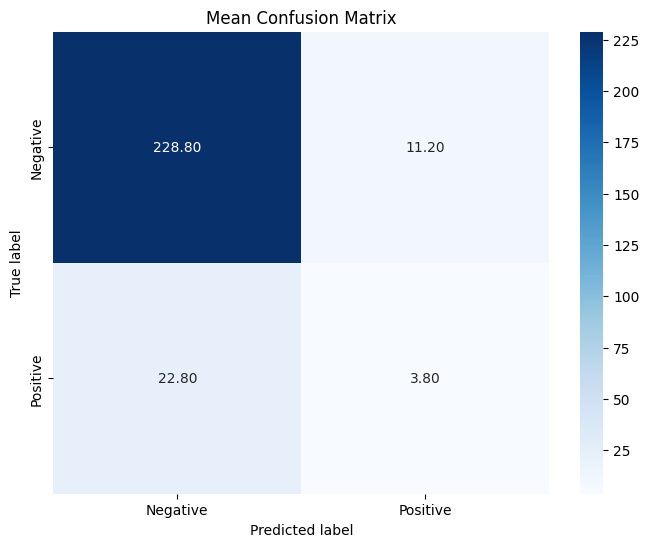

Mean Average Precision: 0.23
Mean Accuracy: 0.87


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE

# Data Preprocessing
def smiles_to_mol(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            raise ValueError(f"Invalid SMILES string: {smiles}")
        return mol
    except Exception as e:
        print(e)
        return None

# Neural Network Model
# Try changing number of hidden layers: 1, 3, 4
# Binary vs continuous vectors: which is better?
class DrugClassifier(nn.Module):
    def __init__(self, input_size):
        super(DrugClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 1)
        self.dropout = nn.Dropout(0.3)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc4(x))
        return x

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=50):
    for epoch in range(epochs):
        model.train()
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            loss.backward()
            optimizer.step()

        # Validation
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                val_loss += criterion(outputs, labels.unsqueeze(1).float()).item()
                predicted = (outputs > 0.5).int()
                total += labels.size(0)
                correct += (predicted.squeeze() == labels).sum().item()

        val_accuracy = correct / total
        print(f'Epoch {epoch+1}/{epochs}, Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.4f}')

# Main execution
if __name__ == "__main__":
    # Load and preprocess data
    df = pd.read_csv('drugData_jan-2024.csv')
    smiles_list = df['smiles'].tolist()
    molecules = [smiles_to_mol(smiles) for smiles in smiles_list]
    molecules = [mol for mol in molecules if mol is not None]
    fingerprints = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048) for mol in molecules]

    X = np.array([list(fp) for fp in fingerprints])
    y = np.array(df['label'])

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    precision_values = []
    recall_values = []
    average_precisions = []
    fprs, tprs = [], []
    confusion_matrices = []
    accuracies = []

    for fold_idx, (train_index, test_index) in enumerate(kf.split(X, y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Apply SMOTE
        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        # Split into train and validation
        X_train_res, X_val, y_train_res, y_val = train_test_split(X_train_res, y_train_res, test_size=0.2, random_state=42)

        # Convert to PyTorch tensors
        X_train_tensor = torch.FloatTensor(X_train_res)
        y_train_tensor = torch.LongTensor(y_train_res)
        X_val_tensor = torch.FloatTensor(X_val)
        y_val_tensor = torch.LongTensor(y_val)
        X_test_tensor = torch.FloatTensor(X_test)
        y_test_tensor = torch.LongTensor(y_test)

        # Create data loaders
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
        train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

        # Initialize model, loss, and optimizer
        model = DrugClassifier(input_size=2048).to(device)
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        # Train the model
        train_model(model, train_loader, val_loader, criterion, optimizer, device)

        # Evaluate on test set
        model.eval()
        with torch.no_grad():
            y_pred_prob = model(X_test_tensor.to(device)).cpu().numpy()

        y_pred = (y_pred_prob > 0.5).astype(int)

        precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
        average_precision = average_precision_score(y_test, y_pred_prob)
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = roc_auc_score(y_test, y_pred_prob)

        fprs.append(fpr)
        tprs.append(tpr)
        precision_values.append(precision)
        recall_values.append(recall)
        average_precisions.append(average_precision)
        cm = confusion_matrix(y_test, y_pred.squeeze())
        confusion_matrices.append(cm)
        accuracy = accuracy_score(y_test, y_pred.squeeze())
        accuracies.append(accuracy)

        plt.plot(recall, precision, lw=2, label=f'Fold {fold_idx+1} (area = {average_precision:.2f})')

    # Plot Precision-Recall Curve
    mean_recall = np.linspace(0, 1, 100)
    precisions = []
    for recall, precision in zip(recall_values, precision_values):
        precisions.append(np.interp(mean_recall, recall[::-1], precision[::-1]))
    mean_precision = np.mean(precisions, axis=0)
    mean_average_precision = np.mean(average_precisions)

    plt.plot(mean_recall, mean_precision, 'k--', lw=2, label=f'Mean PR (AP = {mean_average_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.savefig('/content/figures/precision_recall_curve_NN.png')
    plt.show()

    # Plot Confusion Matrix
    mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(mean_confusion_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title('Mean Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.savefig('/content/figures/confusion_matrix_NN.png')
    plt.show()

    # Print results
    mean_accuracy = np.mean(accuracies)
    print(f"Mean Average Precision: {mean_average_precision:.2f}")
    print(f"Mean Accuracy: {mean_accuracy:.2f}")

In [ ]:
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

# This code is just for visualization purposes
# Calculate mean precision-recall curve
mean_recall = np.linspace(0, 1, 100)
precisions = []
for recall, precision in zip(recall_values, precision_values):
    precisions.append(np.interp(mean_recall, recall[::-1], precision[::-1]))
mean_precision = np.mean(precisions, axis=0)

mean_average_precision = np.mean(average_precisions)

# Plot Precision-Recall Curve
pr_fig = go.Figure()
pr_fig.add_trace(go.Scatter(
    x=mean_recall,
    y=mean_precision,
    mode='lines',
    line=dict(dash='dash', color='black', width=2),
    name=f'Mean PR (AP = {mean_average_precision:.2f})'
))

pr_fig.update_layout(
    title="Precision-Recall Curve",
    xaxis_title="Recall",
    yaxis_title="Precision",
    legend=dict(x=0.01, y=0.01)
)
pr_fig.show()

# Calculate and plot mean confusion matrix
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
conf_matrix_fig = px.imshow(
    mean_confusion_matrix,
    text_auto=".2f",
    color_continuous_scale="Blues",
    labels={"x": "Predicted label", "y": "True label", "color": "Count"},
    x=["Negative", "Positive"],
    y=["Negative", "Positive"]
)
conf_matrix_fig.update_layout(
    title="Mean Confusion Matrix",
    xaxis_title="Predicted label",
    yaxis_title="True label"
)
conf_matrix_fig.show()

# Print metrics
mean_accuracy = np.mean(accuracies)
print(f"Mean Average Precision: {mean_average_precision:.2f}")
print(f"Mean Accuracy: {mean_accuracy:.2f}")



Mean Average Precision: 0.23
Mean Accuracy: 0.87
